# CPSC 330 Lecture 2

# Lecture outline

- Training a decision tree using scikit-learn (25 min)
- Break (5 min)
- Decision tree splitting rules (5 min)
- ML model parameters and hyperparameters (10 min)
- True/False questions (25 min)

Total: 90 min

# TODO

reconcile with assumed video pre-watching

In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 9)

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# conda install python-graphviz
# pip install python-graphviz
import graphviz

In [3]:
# conda install scikit-learn
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [4]:
# pip install git+git://github.com/mgelbart/plot-classifier.git
from plot_classifier import plot_classifier

## Training a decision tree using scikit-learn (20 min)

### Using scikit-learn's fit/predict

In [10]:
model = DecisionTreeClassifier(max_depth=1)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [11]:
type(model)

sklearn.tree.tree.DecisionTreeClassifier

We'll pick a few examples at random just for a toy example.

In [12]:
df = pd.read_csv('data/cities_USA.csv', index_col=0).sample(6, random_state=100)
df

,lon,lat,vote
249,-124.027305,40.822381,blue
319,-110.941976,42.712829,red
174,-84.569611,39.032378,red
286,-95.340293,41.827063,blue
185,-77.316731,39.210042,blue
236,-100.310773,40.578560,red


In [13]:
X = df.drop(columns=['vote'])
y = df[['vote']]

In [14]:
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
df

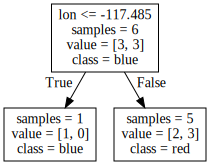

In [15]:
dot_data = export_graphviz(model)
graphviz.Source(export_graphviz(model,
                                out_file=None,
                                feature_names=X.columns,
                                class_names=["blue", "red"],
                                impurity=False))

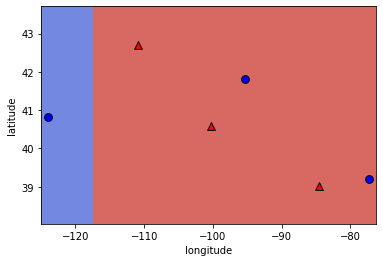

In [16]:
plt.figure()
ax = plt.gca()
plot_classifier(X, y, model, ax=ax, ticks=True);
plt.ylabel("latitude");
plt.xlabel("longitude");

In [17]:
model.score(X, y)

0.6666666666666666

In [18]:
y

,vote
249,blue
319,red
174,red
286,blue
185,blue
236,red


In [19]:
model.predict(X)

array(['blue', 'red', 'red', 'red', 'red', 'red'], dtype=object)

- we can also predict a brand new (made up) point

In [20]:
X

,lon,lat
249,-124.027305,40.822381
319,-110.941976,42.712829
174,-84.569611,39.032378
286,-95.340293,41.827063
185,-77.316731,39.210042
236,-100.310773,40.578560


In [23]:
made_up_X = np.array([-85, 30])


In [24]:
made_up_X.shape

(2,)

In [26]:
made_up_X = made_up_X[np.newaxis]

In [27]:
made_up_X.shape

(1, 2)

In [28]:
model.predict(made_up_X)

array(['red'], dtype=object)

In [ ]:
model.fit(X, y)

Let's look at a deeper tree now, on the full data set.

In [29]:
df = pd.read_csv('data/cities_USA.csv', index_col=0)
X = df.drop(columns=['vote'])
y = df[['vote']]

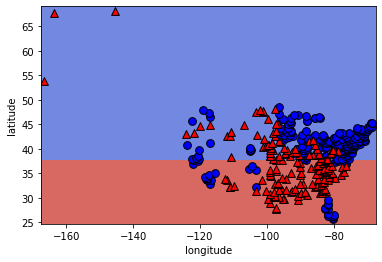

In [30]:
model = DecisionTreeClassifier(max_depth=1)
model.fit(X,y)

plt.figure()
ax = plt.gca()
plot_classifier(X, y, model, ax=ax, ticks=True);
plt.ylabel("latitude");
plt.xlabel("longitude");

In [31]:
model.score(X,y)

0.7475

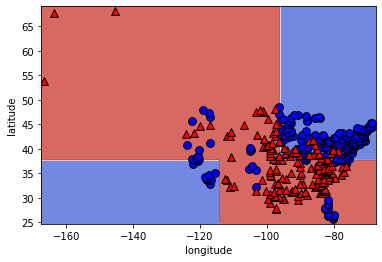

In [36]:
model = DecisionTreeClassifier(max_depth=2)
model.fit(X,y)
plt.figure()
ax = plt.gca()
plot_classifier(X, y, model, ax=ax, ticks=True);
plt.ylabel("latitude");
plt.xlabel("longitude");

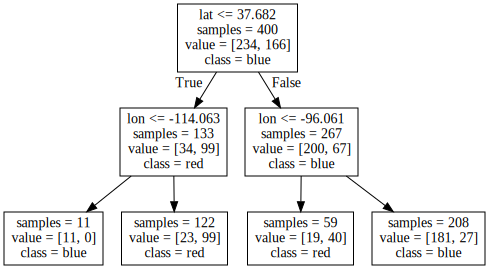

In [33]:
dot_data = export_graphviz(model)
graphviz.Source(export_graphviz(model,
                                out_file=None,
                                feature_names=X.columns,
                                class_names=["blue", "red"],
                                impurity=False))

In [37]:
model.score(X,y)

0.8275

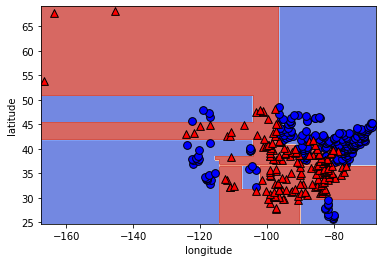

In [38]:
model = DecisionTreeClassifier()
model.fit(X,y)
plt.figure()
ax = plt.gca()
plot_classifier(X, y, model, ax=ax, ticks=True);
plt.ylabel("latitude");
plt.xlabel("longitude");

In [39]:
# dot_data = export_graphviz(model)
# graphviz.Source(export_graphviz(model,
#                                 out_file=None,
#                                 feature_names=X.columns,
#                                 class_names=["blue", "red"],
#                                 impurity=False))

In [40]:
model.score(X,y)

1.0

## Break (5 mins)

## Decision tree splitting rules (5 mins)

- You saw in the video that a tree with only one split is called a "decision stump"
- How do we decide how to split the data?
- Basic idea is to pick a criterion (see [here](https://scikit-learn.org/stable/modules/tree.html#mathematical-formulation)) and then maximize it across possible splits.
- It turns out accuracy is not a good metric, so we use some fancier metrics like "entropy" or "gini impurity".
- The basic idea is to try and make each leaf as "pure" as possible.

##  ML model parameters and hyperparameters (10 mins)

- When you call `fit`, a bunch of values get set, like the split variables and split thresholds. 
- These are called **parameters**
- But even before calling `fit` on a specific data set, we can set some "knobs" that control the learning.
- These are called **hyperparameters**

In [42]:
df = pd.read_csv('data/cities_USA.csv', index_col=0)
X = df.drop(columns=['vote'])
y = df[['vote']]
df

,lon,lat,vote
1,-80.162475,25.692104,blue
2,-80.214360,25.944083,blue
3,-80.094133,26.234314,blue
4,-80.248086,26.291902,blue
...,...,...,...
397,-96.551116,48.591592,blue
398,-166.519855,53.887114,red
399,-163.733617,67.665859,red
400,-145.423115,68.077395,red


In scikit-learn, hyperparameters are set in the constructor:

In [44]:
model = DecisionTreeClassifier(max_depth=3) 
model.fit(X, y);

Here, `max_depth` is a hyperparameter. There are many, many more! See [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).



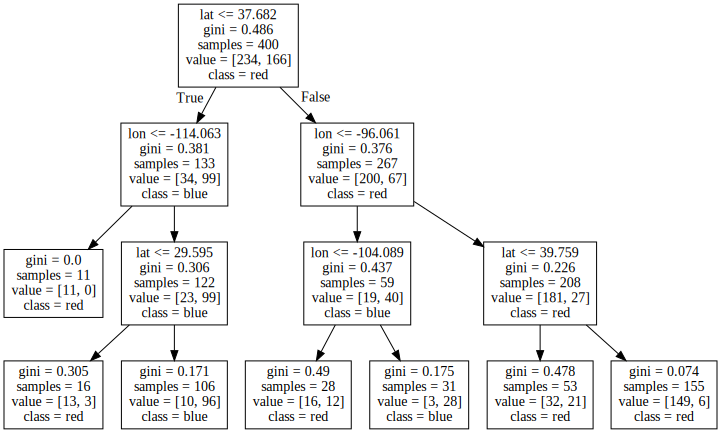

In [45]:
dot_data = export_graphviz(model)
graphviz.Source(export_graphviz(model,
                                out_file=None,
                                feature_names=X.columns,
                                class_names=["red", "blue"],
                                impurity=True))

To summarize:

- **parameters** are automatically learned by the algorithm during training
- **hyperparameters** are specified based on:
    - expert knowledge
    - heuristics, or 
    - systematic/automated optimization (more on that later on)

## Preview of next class...

- Why not just use a very deep decision tree for every supervised learning problem and get super high accuracy?

## True/False questions (25 min)

Which of these are true about decision trees?

1. Decision trees are typically binary trees (2 children per node).
2. Typically, the features that we split on at each node are chosen by a human.
3. A decision stump is defined as a decision tree with depth $\leq 3$.
5. The same feature can be split on multiple times in a tree with depth > 1.

<br><br><br><br><br><br>

For each of the following, answer with `fit` or `predict`:

1. At least for decision trees, this is where most of the hard work is done.
2. Only takes `X` as an argument.
3. In scikit-learn, we can ignore its output.
4. Is called first (before the other one).